<a href="https://colab.research.google.com/github/dbetteb/early-ML/blob/master/TP_GANs_ENGLISH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to GAN : Mechanical Design Generation


This tutorial aims at getting familiar with the basic building blocks of Generative Adversarial Networks (GANs). At the beginning of this notebook, we will review and play with a GAN simulator similar to Tensorflow Playground : [GAN lab](https://poloclub.github.io/ganlab/). Then we will present our database that we are going to process today, i.e. a set of images representing mechanical designs. 



## GAN 101
 


### Generative Models 

Generative Adversarial Networks are a recent approach introduced by Ian Goodfellow (in [1] then a researcher at the University of Montreal) taking advantage of the characteristics of both generative and discriminative approaches in order to generate inputs similar to a reference learning set. As such, it is an unsupervised generative approach because the first objective of GANs is to generate unlabeled inputs (called $X$) "close" (in a sense to be specified) to the distribution of a training reference set.  GANs have been one of the most innovative ideas in machine learning in recent years (Yan Le Cun, director of AI at Facebook, called them "the best idea in machine learning in the last 10 years") see [here](https://medium.com/thecyphy/gans-what-and-where-b377672283c5).

![](https://scx2.b-cdn.net/gfx/news/2018/5c1a01e78b2f1.jpg)


The GAN approach has since its introduction in 2014 generated a tremendous amount of interest from the machine learning community and beyond because it is based on a simple idea and a priori allows one to efficiently learn the distribution of a training set and generate examples close to it. Also, unlike many machine learning methods that are as accurate as the input data, GANs offer a kind of creativity in the generated examples. The most prominent example is the use of GANs on images (especially of faces). Typically GANs have been used by NVIDIA to generate faces from a set of existing face photos and the generated faces have reached an impressive level of realism.

### GAN Overview

As the name suggests, a GAN (or Generative Antagonistic Network) is globally a generative model. Its goal is to generate $X$ examples close to a reference distribution. Its particularity is both to combine $2$ adversarial models, one generative and the other discriminative, and to rely on the recent successes of deep learning. Other generative models have recently been developed, exploiting the advances of deep learning, for example :

* methods that explicitly model the densities of the training sets, either exactly (_Fully Visible Belief Nets_) or approximately (_Variational Autoencoder_ or _Boltzmann machine_)
* methods that implicitly model the densities and allow them to be sampled, such as Markov chain approaches (_Generative Stochastic Network_) and direct approaches such as GAN 

We thus find, as in Bayesian inference (and in reinforcement learning), the very classical distinction in machine learning between "model" based methods (density in this case, variational inference type) and "model-free" methods (based on sampling of the density which is not explicitly written down, Monte Carlo Markov Chain type). Compared to other generative models Goodfellow in \cite{goodfellow2016nips} cites as advantages of GANs the following:

* possibility to generate **samples in parallel** 
* the generating function of GANs can be **very versatile** (hence also a **great practical difficulty to train it correctly**)
* the generating function of GAN can be **very versatile** (hence also a **great practical difficulty to train it correctly**)
* no **Markov hypothesis** (no chain) 
* the GANs are considered as **asymptotically convergent**.
* finally, the results produced by the **GANs are substantially and subjectively superior** to other generative models


Finally, let us mention that two competing approaches are generating a lot of attention from the machine learning community:

* Flow models
* Autoregressive models

Both approaches generate a lot of expectations from the research community because these methods could overcome some of the shortcomings of GAN (mixed data in particular, easier training), see for example \cite{odena2019open}.

### Different GAN flavor and their applications

A GAN is thus a generative model composed of two (sometimes more) models. The approach takes advantage of both discriminative and generative models. In itself, the purpose of a GAN is generative, its goal is to generate examples close to the learning examples. And to achieve this, a GAN relies on a discriminative model which will allow to improve the quality of the generated examples. The analogy of the GAN, made in the founding article \cite{goodfellow2014generative} is that of counterfeiters and the police. The counterfeiters generate counterfeit bills that are initially crude and are quickly detected, but as the returns come in, the counterfeiters generate more and more realistic bills until they fool the police. Paradoxically, the police indirectly allow the counterfeiters to improve by "measuring" the quality of the counterfeits through comparison with the real bills. At convergence, no one can distinguish between real and counterfeit bills.

Properly trained, a GAN can generate examples very close to those of the learning base. During its training, a GAN will progressively improve its ability to generate examples by subjecting them to a classifier whose goal is to discriminate the "real" examples (those of the training base) from those generated. The structure of a GAN always includes two elements 

* A **generator** which learns to generate examples. These examples are used to learn a discriminator.
* A **discriminator** which learns to separate the "true" examples from those coming from the generator. The "true" examples are labeled positively and those coming from the generator negatively. The discriminator is thus a classical classifier.


![](https://sthalles.github.io/assets/dcgan/GANs.png)

At the beginning of the training, the generator produces completely random examples ("white noise") and the discriminator easily separates the false examples from the true ones. As the training progresses, if it goes well (which in the case of GANs is often problematic) the generated examples improve (i.e. get closer to the distribution of the "true" examples) and some examples may deceive the discriminator. Although it is not necessary, each of these bricks is a neural network, which is why they are called Antagonistic Networks. In absolute terms, any generative (resp. discriminative) model could be the generator (resp. the discriminator), nevertheless the real innovation in the practical training of GANs proposed by Goodfellow is the use of "crossed" back-propagation between the generator and the discriminator. Indeed, the generator learns to improve these examples using the gradient of the classifier. It is for this reason that GANs have neural networks as their basic components.



Moreover, among the main applications of GANs in the literature, we find the generation of realistic images in the lead. Progress in terms of deep learning architectures dedicated to images, algorithms and learning frameworks, and finally the availability of numerous image datasets judiciously gathered (such as CelebA for faces...) have allowed a significant acceleration of the realism of images generated by GANs (and in particular faces). ) have allowed a significant acceleration of the realism of the images generated by GANs (and in particular faces), going from low-precision images with various defects (frame effects for example) to images that can pass for real high-resolution images in less than 4 years, as can be seen in the following image (the first line at the top corresponds to the year 2015 and the last line at the bottom to the year 2018) :

![](https://dudeperf3ct.github.io/images/gan/gan_progress.png)

Among the most impressive applications we can also mention :

* style or texture transfer that allows to apply uncommon filters like transforming a real landscape image into a painter's painting (Monet, Van Gogh, Cezanne) representing the same image. The approach is called CycleGAN.
* the generation of very high resolution images. Some GAN architectures are indeed able to generate images with better resolutions than the input ones. 

Finally, let's also mention the recent application Zao which produces _deepfakes_, fake videos in which faces are embedded in a very realistic way. The generation of such videos is based on GAN. Finally, let's also mention GANlab, an online resource allowing to train GANs **in the browser** that we will deal with in question 1.

## A few theoretical properties of GAN's




### Vanilla GAN

Avant d'aller plus loin dans la description des GAN, précisons quelques notations. On appelle $D$ le mapping correspondant au discriminateur, c'est-à-dire la fonction qui à une entrée (vraie ou non) notée $x$ (typiquement ce peut être les valeurs de pixel d'une image RGB de taille $64 x 64$ auquel cas $x \in ([0,256]^{64 \times 64})^3$ et donc est de taille $3 \times 64 \times 64$) associe la probabilité (au sens d'un classifieur donc non calibrée) que $x$ soit une image réelle ou non. Ainsi, $D(x)$ devra être élevée si l'image est réelle et faible si l'image est fausse. Pour les images générées, on considère un espace dit latent de variable $z$ échantillonnée à partir d'une distribution gaussienne. On note $G$ le mapping entre cet espace latent et l'espace des sorties fausses (des images fausses), c'est notre fonction génératrice : $G(z)$ est donc une image. L'entraînement d'un GAN consiste donc à régler les paramètres de chacune de ces fonctions $D$ et $G$ de sorte que $G$ génère des sorties $G(z)$ proches de la disitribution des $x$ (entrées vraies) d'origine. Ainsi, intuitivement, on souhaite ainsi régler $D$ et $G$ tels que :

* $D$ soit un bon discriminateur sur les vraies images, c'est-à-dire identifie bien les vraies imagess. On cherche donc à maximiser $D(x)$ en moyenne pour des $x$ issues de la distribution d'entrées réelles. Soit \begin{equation}
        \max_{D} \mathbb{E}_{x \sim p_{data}(x)}D(x)
    \end{equation} 
* dans le même temps, on veut aussi que la probabilité que le discriminateur soit trompé par le générateur sur des images générées depuis l'espace latent $D(G(z))$ soit maximale. Car cela signifie que le discriminateur n'arrive plus à distinguer les vraies images de celles générées. Donc en moyenne, sur la distribution des variables latentes, on souhaite régler le générateur $G$ de telle sorte que la probabilité que $D$ se trompe soit la plus élévée (si en même temps $D$ est bon sur les vraies images), soit 
    \begin{equation}
        \max_{G} \mathbb{E}_{z \sim p_{z}(z)}D(G(z))
    \end{equation}
En définitive la fonction coût à optimiser lors de l'entraînement du GAN est donc simplement l'addition de ces deux objectifs :
\begin{equation}
    \max_{G}  \max_{D} = \mathbb{E}_{x \sim p_{data}(x)}D(x) + \mathbb{E}_{z \sim p_{z}(z)}D(G(z))
\end{equation}
pour des raisons à la fois pratiques et théoriques ce problème est transformé en :
\begin{equation}
    \min_{G}  \max_{D} = \mathbb{E}_{x \sim p_{data}(x)} \log{(D(x))} + \mathbb{E}_{z \sim p_{z}(z)}\log{(1-D(G(z)))}
\end{equation}
notamment, en prenant non pas la probabilité $D$ directement mais son logarithme plus stable numériquement (notamment pour les petites valeurs) comme dans le cas classique de l'apprentissage statistique fréquentiste où on cherche à maximiser la log vraisemblance plutôt que la vraisemblance. La transformation en $\min_G$ permet de transformer le problème d'apprentissage du GAN en un problème de min max. Pour ce type de problème, classique en théorie des jeux et en intelligence artificielle, on dispose à la fois de résultats théoriques et d'heuristiques pratiques pour la résolution. Du point de vue de la théorie des jeux, l'apprentissage d'un GAN peut être vu comme un jeu à somme nulle (les gains de l'un sont les perte de l'autre, comme les échecs ou le tarot) non coopératif. L'un des opposants a pour but de maximiser sa fonction d'utilité et l'autre opposant a pour but de la minimiser. A convergence d'un telle situation, on parle d'équilibre de Nash, caractérisé par le fait que chacun des opposants ne "gagne" plus (ne peut plus minimiser la fonction d'utilité de l'autre) à chercher à augmenter sa propre fonction d'utilité.

### Fonction de perte et entraînement 

Si on note $\theta_D$ (resp. $\theta_G$) les paramètres (internes, à régler lors de l'apprentissage, typiquement les poids des connections pour un réseau de neurones) du modèle discriminateur (resp. générateur), on note alors $V(\theta_D, \theta_G)$ :
\begin{equation}
    V(\theta_D, \theta_G) = \mathbb{E}_{x \sim p_{data}(x)} \log{(D(x;\theta_D))} + \mathbb{E}_{z \sim p_{z}(z)}\log{(1-D(G(z;\theta_G);\theta_D))}
\end{equation}
la fonction objective de l'entraînement du GAN. Et on alors :
\begin{eqnarray}
    \frac{\partial V(\theta_D, \theta_G)}{\partial \theta_D}  & = & \mathbb{E}_{x \sim p_{data}(x)}\Big[ \frac{\partial }{\partial \theta_D} \log{(D(x;\theta_D))} \Big] + \mathbb{E}_{z \sim p_{z}(z)}\Big[ \frac{\partial }{\partial \theta_D} \log{(1-D(G(z;\theta_G);\theta_D)) \Big]} \\
      & = & \mathbb{E}_{x \sim p_{data}(x)}\Big[ \frac{\partial D(x;\theta_D)}{\partial \theta_D} \frac{1}{D(x;\theta_D)} \Big]+\mathbb{E}_{z \sim p_{z}(z)} \Big[ 
    -\frac{\partial D(G(z; \theta_G))}{\partial \theta_D}
    \frac{1}{1-D(G(z; \theta_G);\theta_D)} \Big]
\end{eqnarray}
et 
\begin{eqnarray}
    \frac{\partial V(\theta_D, \theta_G)}{\partial \theta_G} & = & 
    \mathbb{E}_{z \sim p_{z}(z)}\Big[ \frac{\partial }{\partial \theta_G} \log{(1-D(G(z;\theta_G);\theta_D))\Big] }
     \\
     & = & 
    \mathbb{E}_{z \sim p_{z}(z)} \Big[- \frac{\partial G(z;\theta_G)}{\partial \theta_G} \frac{\partial D(G(z;\theta_G);\theta_D)}{\partial \theta_D} \frac{1}{1-D(G(z; \theta_G);\theta_D)}
    \Big]
\end{eqnarray}
Où chacune des quantités $\frac{\partial D}{\partial \theta_D}$ et $\frac{\partial G}{\partial \theta_G}$ peut être calculée par rétro-propagation du gradient avec un framework classique adapté aux réseaux de neurones et l'espérance est classiquement approchée empiriquement :
\begin{equation}
    \mathbb{E}_{x \sim p_{data}(x)} \sim \frac{1}{m} \sum_{i = i}^m ...(x_i)...
\end{equation}

Les paramètres $\theta_G$ et $\theta_D$ sont aussi classiquement mis-à-jour par descente de gradient à pas adaptatif (avec éventuellement approche par lots (a.k.a _batch_) pour le calcul du gradient comme en apprentissage profond) adaptée au problème de minmax :
\begin{eqnarray}
   \theta_D^{(i+1)} & = & \theta_D{(i)}+\alpha_D \nabla_{\theta_D} V(\theta_D, \theta_G) \\
\end{eqnarray}
et
\begin{eqnarray}
   \theta_G^{(i+1)} & = & \theta_G{(i)}+\alpha_G \nabla_{\theta_D} V(\theta_D, \theta_G) \\
\end{eqnarray}

où $\alpha_D$ et $\alpha_G$ sont les taux d'apprentissage (souvent différents).

Si on suppose qu'on dispose d'une infinité de données et d'une capacité du discriminateur infinie (au sens de la dimension de Vapnik-Chervonenkis), on peut alors à chaque itération, théoriquement, déterminer un discriminateur optimal. Dans ce cas, on peut garantir l'existence et la convergence vers le générateur optimal.
De la même manière, pour un générateur $G$ donné, on peut montrer que le discriminateur optimal $D$ est la classifieur optimal de Bayes.

\begin{equation}
    D_G^\star(x) = \frac{p_{data}(x)}{p_{data}(x)+p_G(x)}
\end{equation}
Toujours en supposant qu'on dispose du discriminateur optimal (toujours à générateur $G$ fixé) :

\begin{equation}
    max_D V(D, G) = -\ln 4 + 2 D_{JS}(p_{data} || p_G)
\end{equation}

où $D_{JS}$ est la divergence de Jensen-Shannon.

\begin{equation}
    2 D_{JS}(p || q) = D_{KL}(p||q) + D_{KL}(q||p) 
\end{equation}
et on observe que le minimum (sur G) est obtenu avec 
\begin{equation}
    p_{data} = p_G
\end{equation}
et donc que le discriminateur optimal a une score de $1/2$. Ceci permet d'avoir un critère objectif de convergence.


### Deep Convolutional GAN

Suite à l'introduction des GAN par Goodfellow, la communauté machine learning a rapidement cherché à faire un pont entre les architectures profondes utilisées en traitement d'image et les GAN. En 2015, deux chercheurs publient \cite{radford2015unsupervised} où est présenté pour la première fois l'approche DCGAN Deep Convolutional Generative Adversarial Networks. Sa spécificité par rapport à un Vanilla GAN est donc d'utiliser des couches convolutives (similaires à celle des CNN) dans l'architecture du discriminateur et des couches dite de _transposed convolutions_ qui à l'inverse des convolutions classiques permettent d'"_up-scale_" l'image. Typiquement, l'architecture du générateur est celle décrite ci-dessous :

![](https://cdn-images-1.medium.com/max/1000/1*rdXKdyfNjorzP10ZA3yNmQ.png)

L'espace latent ($z$) est typiquement échantillonné via un modèle gaussien en dimension $100$ (ou au-delà). L'architecture convolutive (dite _up-convolutional_ ou _reverse recognition_) est composée :

* d'opérateur de **sur-échantillonnage** (_upsampling layers_) qui remplacent les couches classiques de _pooling_ par des opérateurs d'extrapolation (bilinéaire, plus proches voisins...).
* des couches dites de **faible résolution** en début de réseau
* des couches dites de **haute résolution** en fin de réseau

Souvent, les architectures des générateurs en Deep Convolutional GAN commencent par une première couche dense dont le rôle est de transformer l'espace latent (de dimension $100$) en une série (i.e nombre de filtres) d'imagettes de très faible résolution. Dans l'architecture présentée plus haut, la première couche dense construit donc $1024$ imagettes de taille $4 x 4$. Ensuite sont appliquées, les fameuses couches de _transposed convolutions_. A l'instar des couches convolutives classiques, ces couches appliquent un noyau de convolution (typiquement de taille $3 x 3$ ou $5 x 5$) sur des imagettes "agrandies" avec du padding et du stride. Ces couches vont donc agrandir chacune des imagettes (par exemple en doublant de $4 x 4$ à $8 x 8$) et dans le même temps combiner plusieurs imagettes entre elles et donc de retenir les imagettes les plus pertinentes au fur et à mesure des couches. 



#### Focus sur les couches de _transposed convolutions_ 

Afin de mieux comprendre le fonctionnement des couches internes du générateur en DCGAN, on a représenté ici des animations de ces couches avec différentes taille de noyau, d'imagette et de stride. Elles sont issues de l'excellent guide de Vincent Dumoulin disponible [ici](https://github.com/vdumoulin/conv_arithmetic).




Sans stride | Avec stride
--- | ---
![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides_transposed.gif) | ![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides_transposed.gif)
![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/arbitrary_padding_no_strides_transposed.gif) | ![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_transposed.gif)

## Question 1 : GAN lab


### Questions 

A l'instar de Tensorflow Playground, [GANlab](https://poloclub.github.io/ganlab/) est un outil *in-browser*  permettant d'entraîner des architectures simples de GAN sur des data sets 2d et d'observer en live l'entraînement du GAN. 

![](https://media.arxiv-vanity.com/render-output/3920740/figure-teaser.png)

- Jouer sur les taux d'apprentissage et observer les résultats. Que constatez-vous ?
- Que doit-on observer sur les métriques en cas de convergence ?

## Question 2 : Présentation du cas des designs mécaniques. Import des données , cohérence de la base



### Présentation générale 

Les données qu'on va traiter sont issues de recherches menées en ce moment (voir [](https://arxiv.org/abs/2010.11833)) avec l'ambition de faciliter le design mécanique à l'aide de techniques issues de l'apprentissage profond. En particulier, on s'intéresse à des modèles permettant de générer des designs mécaniques vus comme des images. Ces designs sont obtenus par des procédés propres au monde du design mécanique et permettent d'esquisser la forme optimale d'une pièce pour qu'elle supporte des charges. On dispose suite à ce travail d'une base de données de plusieurs milliers de design mécaniques représentés par des images en niveaux de gris où $0$ indique la présence de matière et $1$ l'absence. Pour importer les données, on commence par monter le compte github suivante



In [ ]:
!git clone https://github.com/dbetteb/Design_Generation_GAN_Tensorflow.git

Cloning into 'Design_Generation_GAN_Tensorflow'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.


On se place dans le bon répertoire. Car  Google Colab n'importe pas directement l'arborescence du git :
```
│   create_dataset.py 
│   Design_Generation_GAN_tensorflow.ipynb 
│   discriminator.py
│   discriminator_2.py
│   generator.py
│   generator_2.py
│   README.md
│   train.zip
│   train_dcgan.ipynb
```
mais crée un dossier temporaire `content` dans lequel on va bien retrouver le contenu du repo github `Design_Generation_GAN_Tensorflow` mais aussi un répertoire `sample_data` qui contient des données génériques pour servir d'exemples à l'import de données dans un notebook Colab. On va donc se positionner dans le bon répertoire.

In [ ]:
%cd Design_Generation_GAN_Tensorflow/
!ls

/content/Design_Generation_GAN_Tensorflow
create_dataset.py			generator_2.py	      TP5_enonce.ipynb
Design_Generation_GAN_tensorflow.ipynb	generator.py	      TP_GANs.ipynb
discriminator_2.py			README.md	      train_dcgan.ipynb
discriminator.py			TP5_correction.ipynb  train.zip


Les données sont dans une archive `.zip`, on va la dézipper directement dans le notebook.

In [ ]:
!unzip train.zip

Archive:  train.zip
 extracting: train/design_2020-01-30 23_12_35_567__1.png  
  inflating: train/design_2020-01-30 23_12_44_398__1.png  
  inflating: train/design_2020-01-30 23_32_37_668__1.png  
 extracting: train/design_2020-01-30 23_34_26_822__1.png  
  inflating: train/design_2020-01-30 23_34_36_544__1.png  
 extracting: train/design_2020-01-30 23_38_50_916__1.png  
 extracting: train/design_2020-01-30 23_43_42_813__1.png  
 extracting: train/design_2020-01-30 23_54_48_218__1.png  
  inflating: train/design_2020-01-30 23_56_34_483__1.png  
  inflating: train/design_2020-01-31 08_08_51_971__1.png  
  inflating: train/design_2020-01-31 08_24_41_805__1.png  
  inflating: train/design_2020-01-31 08_30_40_089__1.png  
  inflating: train/design_2020-01-31 08_41_07_903__1.png  
 extracting: train/design_2020-01-31 08_47_59_988__1.png  
  inflating: train/design_2020-01-31 08_59_01_301__1.png  
 extracting: train/design_2020-01-31 09_03_40_167__1.png  
 extracting: train/design_2020-01-31

### Questions 

Avant tout entraînement de GAN, nous allons estimer la dispersion des données d’entrées et s’assurer que les différent design restent cohérents. 

* De combien de design dispose-t-on ? 
* Superposer sur un même graphique différents design.  
* Chaque design a un certain niveau de matière (nombre de pixels de valeurs 1). Tracer l’histogramme de ce niveau de matière sur tous les design. 
* Quelle est votre conclusion sur la cohérence des design ?

### Import des images

In [ ]:
import tensorflow as tf
import os
import time
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
from create_dataset import load_data

On charge les données

In [ ]:
ROOT_PATH = "./"
train_data_directory = os.path.join(ROOT_PATH, "train/")
images_train = load_data(train_data_directory)

On en profite pour créer le dataloader de tensorflow permettant de charger les images par batch

In [ ]:
BATCH_SIZE = 32
train_dataset = tf.data.Dataset.from_tensor_slices(images_train).shuffle(5000).batch(BATCH_SIZE)

### Nombre de design 

Evaluer le nombre d'images, la taille des images et le nombre de channel.

(3885, 50, 50, 1)

On trace un design au hasard

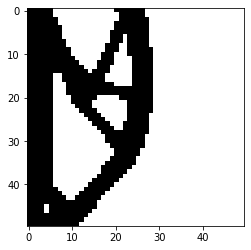

### Tracés de plusieurs design

On utilise `subplot`

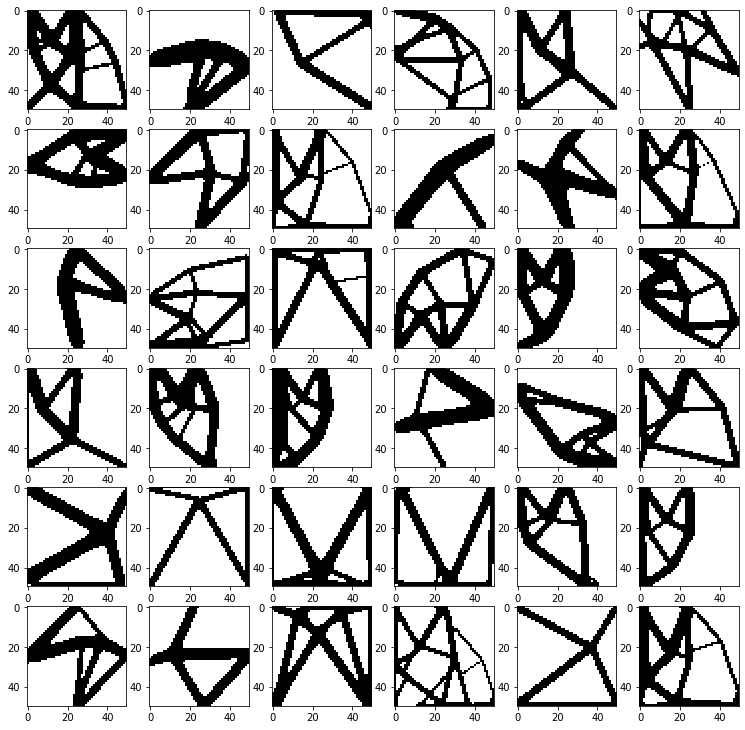

In [ ]:
def gen_index(nmax):
  return np.random.randint(1,nmax)

plt.figure(figsize=[15,15])  # create a plot figure
nside = 6
# create the first of two panels and set current axis
for i in range(1,nside+1):
  for j in range(1,nside+1):
      plt.subplot(nside+1, nside+1, (nside+1)*(i-1)+j) # (rows, columns, panel number)
      plt.imshow(images_train[gen_index(3885), :, :, 0], cmap='gray')

### Calcul de la dispersion du taux de matière 

On commence par créer une fonction qui calcule pour une image le taux de matière

In [ ]:
def MatterRate(image_index=1):
  return ##

## ensuite on l'applique sur toute la base

On utilise ensuite la fonction `hist`.

Text(0.5, 1.0, 'Dispersion du taux de matière')

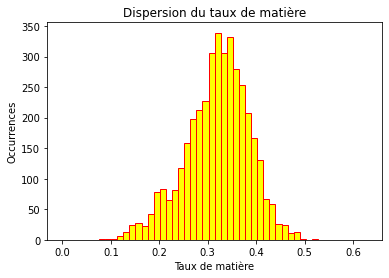

### Conclusion sur la cohérence des données

La base comprend 3885 design mecaniques. Ces designs correspondent à des structures élancées et comprennent tous un certain nombre de barres assez fines. Néanmoins, certains design ont plus de matière que d'autres et les designs n'ont d'orientation propre (contrairement par exemple à la base MNIST où les chiffres ont une orientation donnée). Bien qu'on observe une distribution assez simple de la matière, on peut s'attendre à une grande diversité de design et donc à une relative complexité de la tâche de génération.

## Question 3 : première architecture de DCGAN

Dans cette partie, on suit le tutorial de Google sur la création d'une architecture simple de DCGAN : [tutorial](https://www.tensorflow.org/tutorials/generative/dcgan)

#### Questions 
Après avoir lu et importé les fonctions suivantes
- Décrire les architectures de générateur et de discriminateur
- Expliquer le calcul de la fonction perte
- Modifier le code original pour prendre en compte les images de design de taille 50 x 50 en appelant `tf.images.resize` sur chaque batch.
- Faire tourner un premier apprentissage

In [ ]:
import glob
import imageio
import PIL
from tensorflow.keras import layers

In [ ]:
images_train = images_train.reshape(images_train.shape[0], 50, 50, 1).astype('float32')

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(images_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

On commence par créer une fonction de construction du modèle de générateur. Attention la simple différence avec le tutorial de Google est la dimension d'entrée des images qu'on modifiera au moment d'appliquer l'étape d'entraînenemt du DCGAN.

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

On crée la même fonction pour le discriminateur

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

#### Décrire les architectures via un schéma

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

#### Faire le lien avec la fonction de perte décrite plus haut

On crée les optimiseurs

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
generator = make_generator_model()
discriminator = make_discriminator_model()

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss

#### - Modifier le code original pour prendre en compte les images de design de taille 50 x 50 en appelant `tf.images.resize` sur chaque batch.

In [ ]:

def train(dataset, epochs):
  gen, disc = [], []  
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      ## ligne à modifier avec tf.images.resize
      print ('epoch:{} - gen_loss:{} - disc_loss:{}'.format(epoch + 1, gen_loss, disc_loss))
      gen.append(gen_loss)
      disc.append(disc_loss)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, seed)
  return gen, disc

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

#### Lancer un premier entraînement du GAN

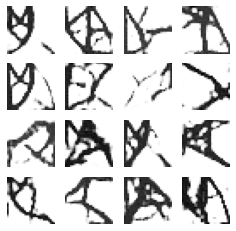

Time for epoch 1800 is 1.3682398796081543 sec


In [ ]:
train(train_dataset, 50*EPOCHS)


## Q4 : Initialisation des architectures et la dimension latente

Les premiers résultats sont plutôt encourageants. On va chercher à les améliorer en compliquant les architectures, on va notamment utiliser des couches dites résiduelles. Pour nous aider, toutes les fonctions sont déjà données et utilisent uniquement tensorflow et non Keras pour illustrer tensorflow dans sa globalité.


- Que font les fonctions `initialize_weights_generator` et `initialize_weights_discriminator` et quelle est le rôle de la variable `nf` ?
- Quelles sont les architectures utilisées  ?
- Initialiser des architectures avec `nf=32` 
- Visualiser un exemple de génération 



### `initialize_weights` ?

Ces deux fonctions permettent d'initialiser tous les paramètres internes des deux architectures et de modifier la première couche convolutionnelle (résiduelle). En particulier, `nf` désigne le nombre de filtres (ou sorties) de la première couche convolutionnelle.

### Les architectures utilisées 

Il s'agit dans les deux cas (générateur et discriminateur) de couches convolutionnelles. Néanmoins, le générateur a pour sortie une image en partant d'une entrée de faible dimension (dimension latente). Donc à l'inverse d'un CNN classique les couches convolutionnelles augmente la taille des sorties de l'entrée de taille 100 jusqu'à une sortie de taille 50x50. 

### Initialiser les architectures 

In [ ]:
weights_d, biases_d = initialize_discriminator_weights(nf = 32)
weights_g, biases_g = initialize_generator_weights(nf = 32)

In [ ]:
noise = tf.random.normal([1,100])
generated_image = generator(noise, weights_g, biases_g )

In [ ]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

## Q5 : Premier entraînement du GAN

- On commence par initialiser les optimiseurs avec les valeurs des learning rate des deux architectures et on crée un optimiseur tensorflow avec `tf.optimizers`
- Examiner la fonction `train_step` que fait-elle ? et que permet de faire la ligne `if epoch...` ?


#### Initialisation des optimiseurs et learning rate

In [ ]:
learning_rate_g = 2e-3
learning_rate_d = 1e-2

In [ ]:
generator_optimizer = tf.optimizers.Adam(learning_rate_g) #tf.optimizers.RMSprop(learning_rate_g)
discriminator_optimizer =  tf.optimizers.Adam(learning_rate_d) #tf.optimizers.RMSprop(learning_rate_d)

#### Fonction `train_step` d'entraînement du GAN

In [ ]:
def train_step(images, epoch):
    batch_size = images.shape[0]
    noise = tf.random.normal([batch_size, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, weights_g, biases_g)

        real_output = discriminator(images, weights_d, biases_d)
        fake_output = discriminator(generated_images, weights_d, biases_d)
        reconstruction_error = tf.reduce_mean( tf.square(images- generated_images))
        gen_loss = reconstruction_error# generator_loss(fake_output) + 
        #gen_loss = -tf.reduce_mean(fake_output) # WGAN
        disc_loss = discriminator_loss(real_output, fake_output)
        # disc_loss = tf.reduce_mean(real_output)-tf.reduce_mean(fake_output) #WGAN
        
        generator_trainable_variables = list(weights_g.values()) + list(biases_g.values())
        gradients_of_generator = gen_tape.gradient(gen_loss, generator_trainable_variables)
        discriminator_trainable_variables = list(weights_d.values()) + list(biases_d.values())
        if epoch<=5  or epoch%5==0:
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_trainable_variables)
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator_trainable_variables))
        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator_trainable_variables))
        # for w in weights_g.keys():
        #     weights_g[w].assign(tf.clip_by_value(weights_g[w], clip_value_min=-0.1, clip_value_max=0.1))
        
    return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, weights_g, biases_g)

    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')

    # plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [ ]:
def train(dataset, epochs):
    i=0
    for epoch in range(epochs):
        # start = time.time()
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch, epoch)
            print ('epoch:{} - gen_loss:{} - disc_loss:{}'.format(epoch + 1, gen_loss, disc_loss))
        # Produce images for the GIF as we go
        # to visualize progress in the animated GIF)
        # seed = tf.random.normal([16, 100])
        # display.clear_output(wait=True)
        # generate_and_save_images(generator,
        #                          epoch + 1,
        #                          seed)
        
    # Generate after the final epoch
    # display.clear_output(wait=True)
    # generate_and_save_images(generator,
    #                        epochs,
    #                        seed)

In [ ]:
train(train_dataset, epochs=6)

In [ ]:
seed = tf.random.normal([16, 100])
generate_and_save_images(generator,
                           5,
                           seed)

## Q6 : Amélioration des résultats 
On observe que le GAN a commencé à mieux capturer certains éléments des design (barres diagonales notamment). Néanmoins, le réseau a vite collapsé sur soit du bruit soit cette barre diagonale. Pour améliorer les générations de ce GAN : 


*   Tester d'autres schéma de mise à jour du discriminateur
*   Changer les optimiseurs et les paramètres de taux d'apprentissage
*   Augmenter le nombre d'epochs
*   Changer la taille de la batch size
...

